## Three topics I selected from Pew data
* High-Speed Internet Usage

* Components of Gamers

* Social Media Usage

### Topic one: High-Speed Internet Usage
#### Question
* Are the most of internet users having high-speed internet at home? 

#### Hypothesis
* I think almost all of inernet users are using high-speed internet at home.

In [1]:
library(dplyr)
Data <- read.csv(file="data3.csv", header=TRUE, sep=",")
Topic1 <- filter(Data,eminuse==1,home4nw==1) %>%
        select(bbhome1,bbhome2) %>%
        group_by(bbhome1)  %>%
        summarise(count=n())
Topic1



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



bbhome1,count
1,42
2,1356
3,13
4,5
5,10
8,50
9,4


In [28]:
filter(Data,eminuse==1,home4nw==1) %>%
        select(bbhome1,bbhome2) %>%
        filter(bbhome1==1,bbhome2!=1) %>%
        group_by(bbhome2)  %>%
        summarise(count=n())

bbhome2,count
2,8
8,2


As we can see, eight of people who chose 1 in Question **bbhome1** changed to 2 in **bbhome2** and two of people who chose 1 in Question **bbhome1** changed to 8 in **bbhome2** .
Hence, I decrease the count of 1 in dataframe Topic1 by ten, increase the count of 2 and 8 by eight and two.

In [42]:
Topic1$count[ Topic1$count == "42" ] <- "32"
Topic1$count[ Topic1$count == "1356" ] <- "1364"
Topic1$count[ Topic1$count == "50" ] <- "52"
Topic1$count <-as.integer(Topic1$count)
Topic1$bbhome1[ Topic1$bbhome1 == "1" ] <- "Dial-up"
Topic1$bbhome1[ Topic1$bbhome1 == "2" ] <- "High-speed"
Topic1$bbhome1[ Topic1$bbhome1 == "3" ] <- "Both"
Topic1$bbhome1[ Topic1$bbhome1 == "4" ] <- "Only phone&tablet"
Topic1$bbhome1[ Topic1$bbhome1 == "5" ] <- "No home internet access"
Topic1$bbhome1[ Topic1$bbhome1 == "8" ] <- "Don't know"
Topic1$bbhome1[ Topic1$bbhome1 == "9" ] <- "Refused"

Topic1<-arrange(Topic1, desc(count))

str(Topic1)
Topic1

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	7 obs. of  2 variables:
 $ bbhome1: chr  "High-speed" "Don't know" "Dial-up" "Both" ...
 $ count  : int  1364 52 32 13 10 5 4


bbhome1,count
High-speed,1364
Don't know,52
Dial-up,32
Both,13
No home internet access,10
Only phone&tablet,5
Refused,4


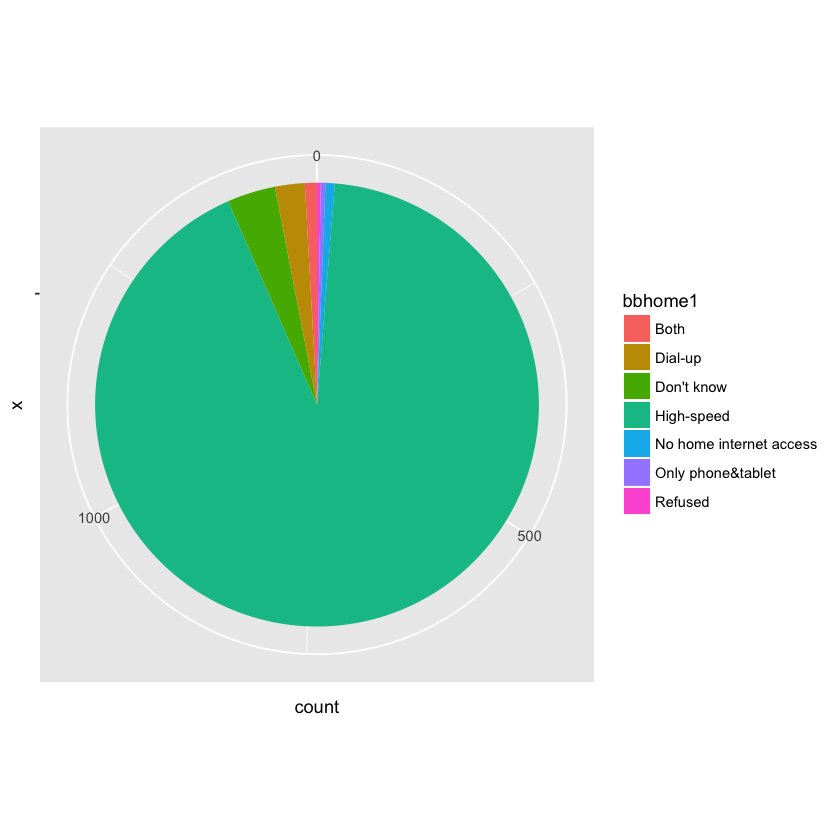

In [50]:
bp<- ggplot(Topic1, aes(x="", y=count, fill=bbhome1))+
geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0)
pie

#### Conclusion
* Hypothesis holds. All most all of the people who has internet at home are using high-speed internet.

### Topic two: Components of Gamer
#### Question
* How does gamer vary with employment or age? 
* What gender of people has more player or gamer?

#### Hypothesis
* I think most of people who play video games frequently are students and youth age. 
* I think males are more likely to play video games frequently than females.

In [54]:
Data <- read.csv(file="data3.csv", header=TRUE, sep=",")
Gender_in_participants <- select(Data,sex) %>%
group_by(sex)  %>%
summarise(count=n())
Gender_in_participants 

sex,count
1,989
2,1012


As we can see, the number of male and female participants are almost same. It is reasonalble to anaylize gender distribution in playing game by using this database.

In [57]:
Gender_played <- select(Data,sex,game1)  %>%
filter(game1=="1") %>%
group_by(sex) %>%
summarise(count=n())
Gender_played

sex,count
1,457
2,468


In [59]:
Gender_gamer <- select(Data,sex,game4)  %>%
filter(game4=="1") %>%
group_by(sex) %>%
summarise(count=n())
Gender_gamer$sex[ Gender_gamer$sex == "1" ] <- "Male"
Gender_gamer$sex[ Gender_gamer$sex == "2" ] <- "Female"
Gender_gamer

sex,count
Male,115
Female,50


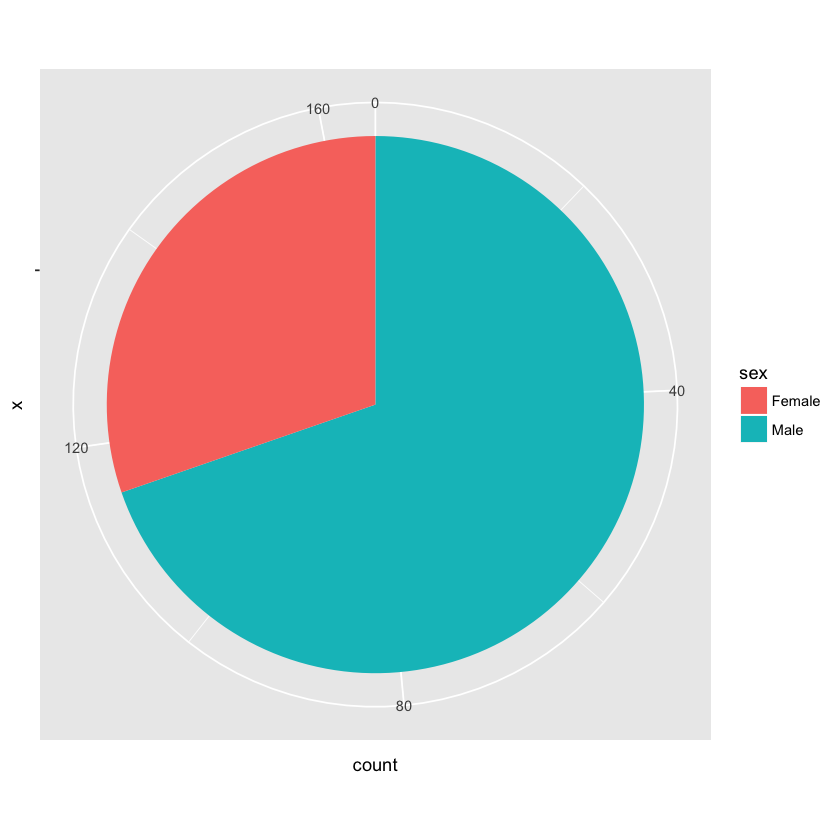

In [61]:
bp1<- ggplot(Gender_gamer, aes(x="", y=count, fill=sex))+
geom_bar(width = 1, stat = "identity")
pie_gender <- bp1 + coord_polar("y", start=0)
pie_gender

In [67]:
Emp_participant<- select(Data,emplnw)  %>%
group_by(emplnw) %>%
summarise(count=n())

Emp_participant

emplnw,count
1,853
2,217
3,601
4,225
5,30
6,51
7,5
8,9
98,3
99,7


In [65]:
Emp_gamer <- select(Data,emplnw,game4)  %>%
filter(game4=="1") %>%
group_by(emplnw) %>%
summarise(count=n())
Emp_gamer

emplnw,count
1,77
2,25
3,24
4,29
5,1
6,6
7,1
8,1
99,1


In [69]:
Age_gamer <- select(Data,age,game4)  %>%
filter(game4=="1")
summarise(Age_gamer, 
  Age = mean(age, na.rm = TRUE))

Age
37.18788


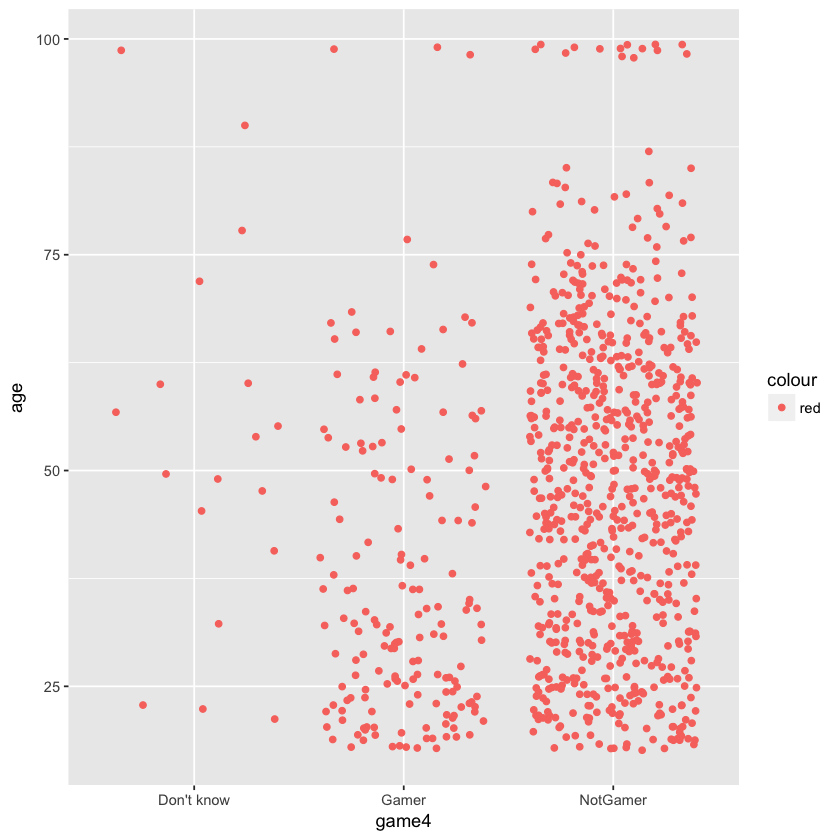

In [79]:
Age_plot <- filter(Data,game1=="1") %>%
select(age,game4)
Age_plot$game4[ Age_plot$game4 == "1" ] <- "Gamer"
Age_plot$game4[ Age_plot$game4 == "2" ] <- "NotGamer"
Age_plot$game4[ Age_plot$game4 == "8" ] <- "Don't know"
Age_plot$game4[ Age_plot$game4 == "9" ] <- "Refused"
qplot(game4,age,colour="red",data=Age_plot,geom="jitter")

#### Conclusion
* As I predicted, pie chart shows that male gamers are more than female gamer. Almost three-quarters of gamers are male. 
* However, I'm suprised that **Emp_gamer** shows only one student is gamer. According to **Emp_participant**,it turns out that only 5 people in all participants are students. Hence, **Emp_gamer** doesn't mean only a few of gamers are student. 
* The average age of gamers is around 37.2. It's not kind of youth as I predicted. It is little bit older.


### Topic three: Social Media Usage
#### Question
* How do social media and social network usage vary with age and gender? 
* How do online dating site and dating phone app usage vary with age? 

#### Hypothesis
* Young people are more likely using social media. I think gender distribution should be half-half. 
* I think young people are more likely using dating sites and apps.

[1] 45.87572

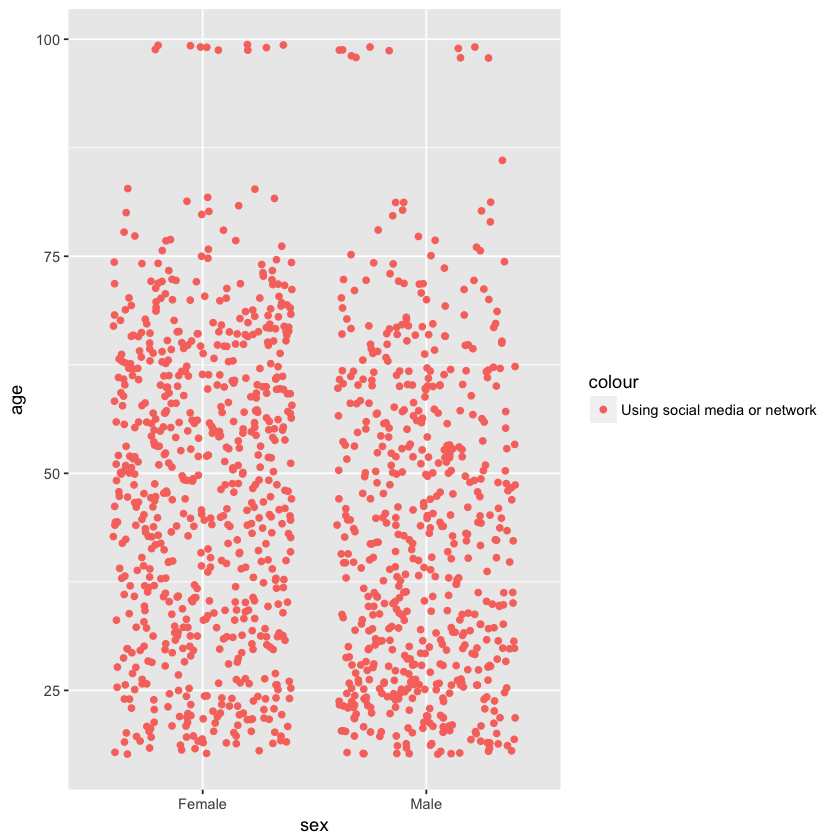

In [91]:
Age_social <-filter(Data,act87a=="1"|act87b=="1") %>%
           select(age,sex,act87a,act87b)
Age_social$sex[ Age_social$sex == "1" ] <- "Male"
Age_social$sex[ Age_social$sex == "2" ] <- "Female"
qplot(sex,age,colour="Using social media or network",data=Age_social,geom="jitter")

mean(Age_social$age)

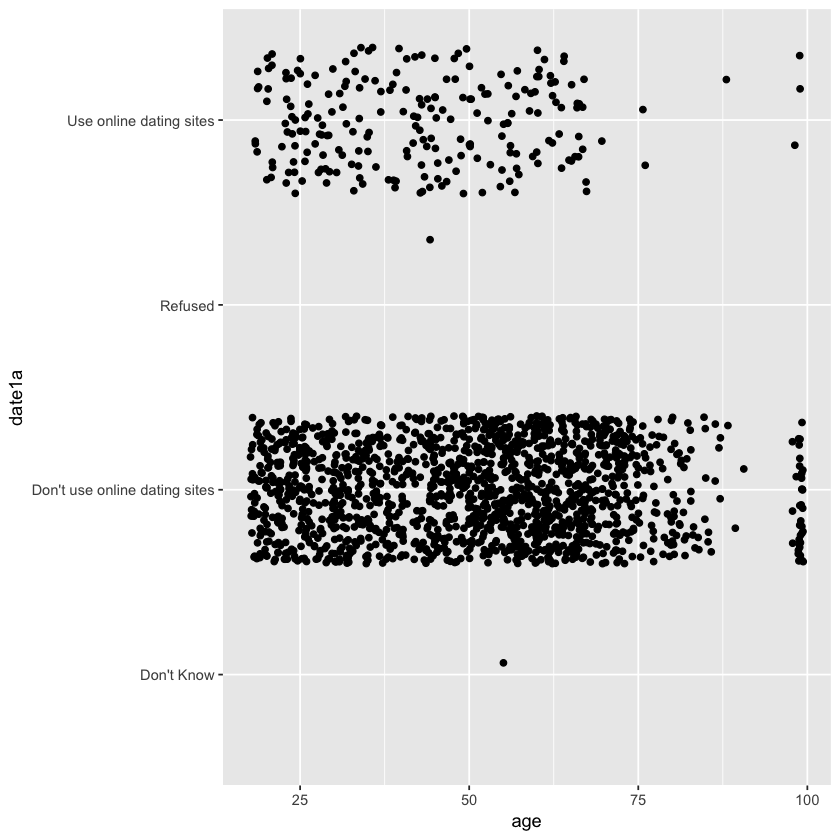

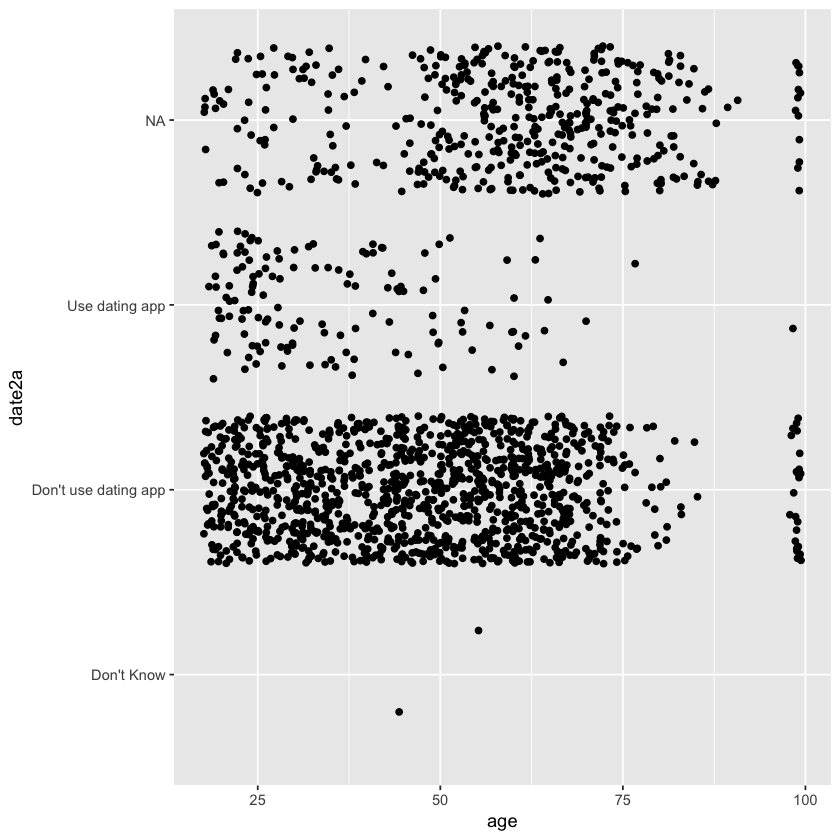

In [111]:
Date_1 <-filter(Data,eminuse=="1"|intmob=="1") %>%
           select(age,date1a,date2a)
Date_1$date1a[ Date_1$date1a == "1" ] <- "Use online dating sites"
Date_1$date1a[ Date_1$date1a == "2" ] <- "Don't use online dating sites"
Date_1$date1a[ Date_1$date1a == "8" ] <- "Don't Know"
Date_1$date1a[ Date_1$date1a == "9" ] <- "Refused"

Date_1$date2a[ Date_1$date2a == "1" ] <- "Use dating app"
Date_1$date2a[ Date_1$date2a == "2" ] <- "Don't use dating app"
Date_1$date2a[ Date_1$date2a == "8" ] <- "Don't Know"
Date_1$date2a[ Date_1$date2a == "9" ] <- "Refused"

qplot(age,date1a,data=Date_1,geom="jitter")
qplot(age,date2a,data=Date_1,geom="jitter")

#### Conclusion
* For those people who use social media and network, their age seems like older than my assumption. Also, female users are a little bit more than make users.
* Most of people have never used online dating sites and dating apps. For users, the number of them is decreasing with increasing of their ages.

### Extra Topic: Education issue
#### Questions 
* Education level distribution in race. 

#### Hypothesis
* I have no idea about this, let's find out.



Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“font metrics unknown for character 0x1e”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“font metrics unknown for character 0x80”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“conversion failure on 'Bachelor’s degree' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“conversion failure on 'Bachelor’s degree' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“conversion failure on 'Bachelor’s degree' in 'mbcsToSbcs': dot substituted for <99>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Bachelor’s degree' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Bachelor’s degree' in 'mb

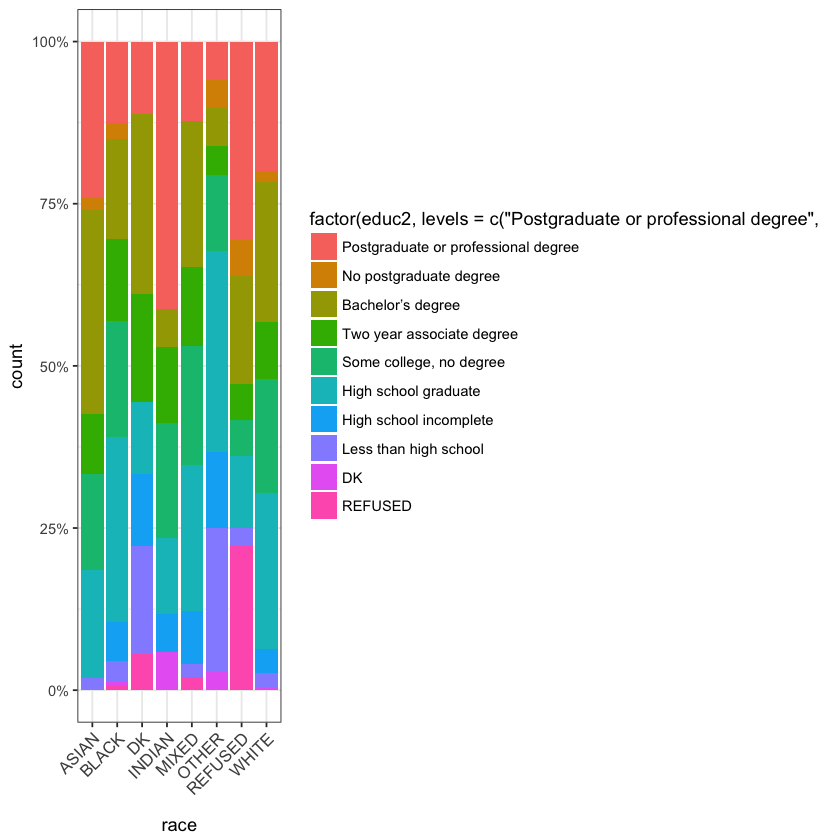

In [45]:
library(ggplot2)
Education_race <- select(Data,race,educ2) %>%
group_by(race,educ2) %>%
summarise(count=n())
Education_race$race[ Education_race$race == "1" ] <- "WHITE\n"
Education_race$race[ Education_race$race == "2" ] <- "BLACK\n"
Education_race$race[ Education_race$race == "3" ] <- "ASIAN\n"
Education_race$race[ Education_race$race == "4" ] <- "MIXED\n"
Education_race$race[ Education_race$race == "5" ] <- "INDIAN\n"
Education_race$race[ Education_race$race == "6" ] <- "OTHER\n"
Education_race$race[ Education_race$race == "8" ] <- "DK\n"
Education_race$race[ Education_race$race == "9" ] <- "REFUSED\n"

Education_race$educ2[ Education_race$educ2 == "1" ] <- "Less than high school"
Education_race$educ2[ Education_race$educ2 == "2" ] <- "High school incomplete "
Education_race$educ2[ Education_race$educ2 == "3" ] <- "High school graduate"
Education_race$educ2[ Education_race$educ2 == "4" ] <- "Some college, no degree"
Education_race$educ2[ Education_race$educ2 == "5" ] <- "Two year associate degree"
Education_race$educ2[ Education_race$educ2 == "6" ] <- "Bachelor’s degree"
Education_race$educ2[ Education_race$educ2 == "7" ] <- "No postgraduate degree"
Education_race$educ2[ Education_race$educ2 == "8" ] <- "Postgraduate or professional degree"
Education_race$educ2[ Education_race$educ2 == "98" ] <- "DK"
Education_race$educ2[ Education_race$educ2 == "99" ] <- "REFUSED"

library (scales) 
ggplot(Education_race[order(Education_race$educ2, decreasing = T),], aes(x=race, y=count, fill=factor(educ2,levels=c("Postgraduate or professional degree","No postgraduate degree","Bachelor’s degree","Two year associate degree","Some college, no degree","High school graduate","High school incomplete ","Less than high school","DK","REFUSED")))) +
geom_bar(stat="identity",position ="fill") +
scale_y_continuous(labels = percent_format()) +
theme_bw() +theme(axis.text.x =
               element_text(size  = 10,
                            angle = 45,
                            hjust = 1,
                            vjust = 1))


#### Conclusion
* As far as I can see from this survey, Asian peole has highest education level. For Asian participants, more than 50% of them has the degree that higher or equal to bachelor degree 